# Notebook: SATtableaux - Tableaux para el problema de las fichas

Este notebook prueba las tres variantes del algoritmo tableaux disponibles en `Archivos/Logica.py`:
- `SATtableauxProfundidad` (búsqueda en profundidad, iterativa)
- `SATtableauxAnchura` (búsqueda en anchura / BFS)
- `SATtableauxBacktracking` (backtracking recursivo)

Estructura: para cada algoritmo habrá una sección con celdas individuales para probar cada una de las 7 reglas y luego celdas separadas para las combinaciones progresivas.
Cada celda de prueba es autónoma (sin bucles) para facilitar la depuración y localización de fallos.

In [2]:
import sys
import os
import time
# Asegurarse de ruta al paquete Archivos
sys.path.insert(0, os.path.abspath('.'))
sys.path.append('Archivos')
from Proyecto import Fichas
from Logica import inorder_to_tree, Ytoria
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120

# Crear instancia del problema
p = Fichas(Nx=4, Ny=4, Nf=3)
reglas = p.reglas
print('Número de reglas cargadas:', len(reglas))
for i, r in enumerate(reglas, start=1):
    print(f'Regla {i}:', str(r)[:120] + ('' if len(str(r))<120 else '...'))

Número de reglas cargadas: 7
Regla 1: (((((((((((((((ĠOĤ)OĨ)OĬ)Oġ)Oĥ)Oĩ)Oĭ)OĢ)OĦ)OĪ)OĮ)Oģ)Oħ)Oī)Oį)
Regla 2: (((((((((((((((ĀOĄ)OĈ)OČ)Oā)Oą)Oĉ)Oč)OĂ)OĆ)OĊ)OĎ)Oă)Oć)Oċ)Oď)
Regla 3: (((((((((((((((ĐOĔ)OĘ)OĜ)Ođ)Oĕ)Oę)Oĝ)OĒ)OĖ)OĚ)OĞ)Oē)Oė)Oě)Oğ)
Regla 4: ((((((((((((((ĀOĐ)OĠ)Oā)Ođ)Oġ)OĂ)OĒ)OĢ)Oă)Oē)Oģ)Y(((((((((((ĄOĔ)OĤ)Oą)Oĕ)Oĥ)OĆ)OĖ)OĦ)Oć)Oė)Oħ))Y(((((((((((ĈOĘ)OĨ)Oĉ)Oę)...
Regla 5: ((((((((((((((((((((((((((((((((((((((((((((((((Ā=Č)Y(Đ=Ĝ))Y(Ġ=Ĭ))Y(Ą=Ĉ))Y(Ĕ=Ę))Y(Ĥ=Ĩ))Y(Ĉ=Ą))Y(Ę=Ĕ))Y(Ĩ=Ĥ))Y(Č=Ā))Y(Ĝ=Đ...
Regla 6: ((((((((((((((((((((((((((((((((((((((((((((((((-ĀO-Đ)Y(-ĀO-Ġ))Y(-ĐO-Ġ))Y(-ĄO-Ĕ))Y(-ĄO-Ĥ))Y(-ĔO-Ĥ))Y(-ĈO-Ę))Y(-ĈO-Ĩ))Y(-...
Regla 7: ((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((-ĀO-ā)Y(-ĀO-Ă))Y(-ĀO-ă))Y(-āO-Ă))Y(-āO-ă))Y(-ĂO-...


## SATtableauxProfundidad (DFS iterativo)
Pruebas individuales: una celda por regla. Cada celda parsea la fórmula, ejecuta `SATtableauxProfundidad`, muestra si es satisfacible, el tiempo y visualiza la interpretación si existe.

Regla 1 - SAT: True Tiempo(s): 0.00044


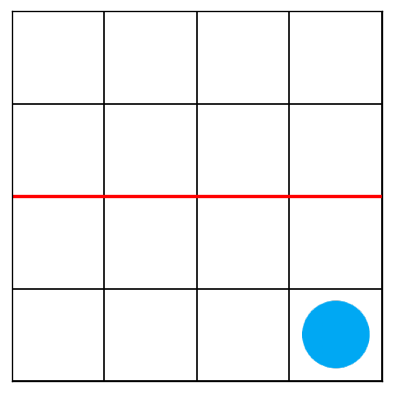

In [3]:
# Regla 1: al menos un círculo
F1 = inorder_to_tree(reglas[0])
t0 = time.time()
I1 = F1.SATtableauxProfundidad()
t1 = time.time()
print('Regla 1 - SAT:', I1 is not None, 'Tiempo(s):', round(t1-t0,6))
if I1 is not None:
    p.visualizar(I1)

Regla 2 - SAT: True Tiempo(s): 0.000443


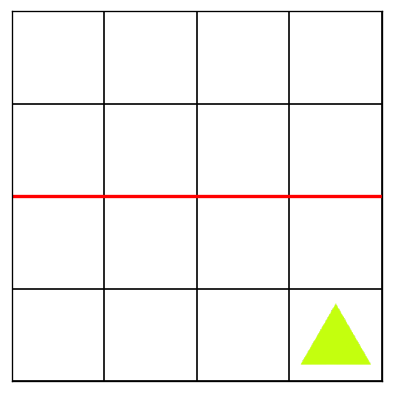

In [4]:
# Regla 2: al menos un triángulo
F2 = inorder_to_tree(reglas[1])
t0 = time.time()
I2 = F2.SATtableauxProfundidad()
t1 = time.time()
print('Regla 2 - SAT:', I2 is not None, 'Tiempo(s):', round(t1-t0,6))
if I2 is not None:
    p.visualizar(I2)

Regla 3 - SAT: True Tiempo(s): 0.000344


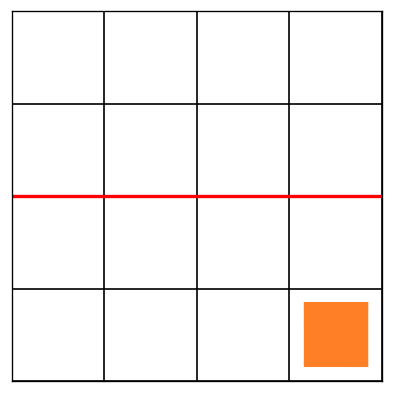

In [5]:
# Regla 3: al menos un cuadrado
F3 = inorder_to_tree(reglas[2])
t0 = time.time()
I3 = F3.SATtableauxProfundidad()
t1 = time.time()
print('Regla 3 - SAT:', I3 is not None, 'Tiempo(s):', round(t1-t0,6))
if I3 is not None:
    p.visualizar(I3)

Regla 4 - SAT: True Tiempo(s): 0.003788


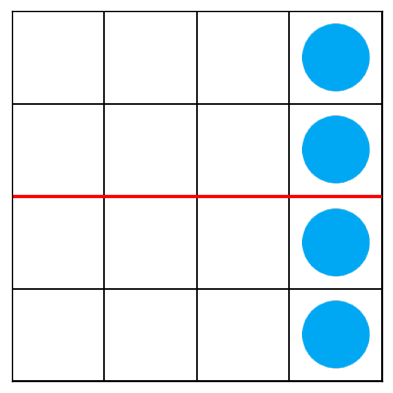

In [6]:
# Regla 4: no filas vacías
F4 = inorder_to_tree(reglas[3])
t0 = time.time()
I4 = F4.SATtableauxProfundidad()
t1 = time.time()
print('Regla 4 - SAT:', I4 is not None, 'Tiempo(s):', round(t1-t0,6))
if I4 is not None:
    p.visualizar(I4)

Regla 5 - SAT: True Tiempo(s): 0.1487


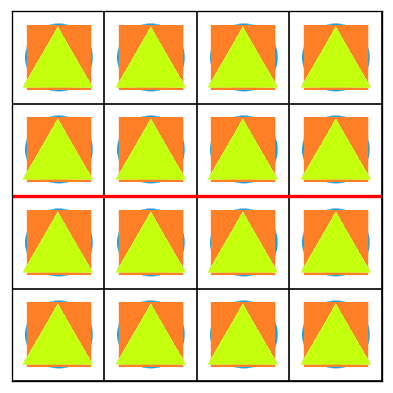

In [7]:
# Regla 5: simetría horizontal
F5 = inorder_to_tree(reglas[4])
t0 = time.time()
I5 = F5.SATtableauxProfundidad()
t1 = time.time()
print('Regla 5 - SAT:', I5 is not None, 'Tiempo(s):', round(t1-t0,6))
if I5 is not None:
    p.visualizar(I5)

Regla 6 - SAT: True Tiempo(s): 0.179112


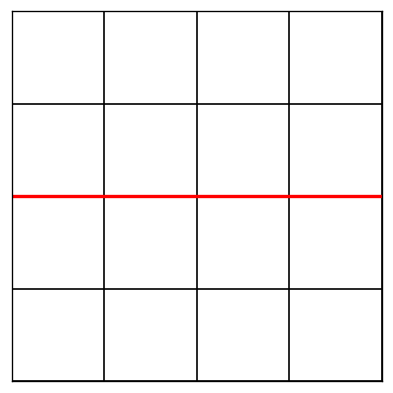

In [8]:
# Regla 6: solo una ficha por casilla
F6 = inorder_to_tree(reglas[5])
t0 = time.time()
I6 = F6.SATtableauxProfundidad()
t1 = time.time()
print('Regla 6 - SAT:', I6 is not None, 'Tiempo(s):', round(t1-t0,6))
if I6 is not None:
    p.visualizar(I6)

Regla 7 - SAT: True Tiempo(s): 0.299487


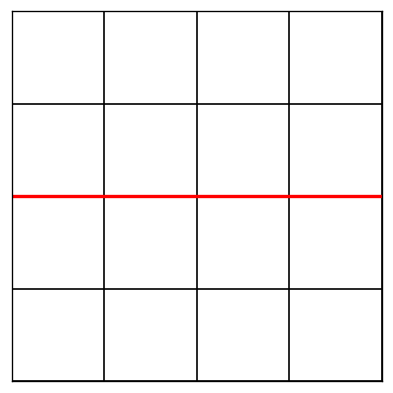

In [9]:
# Regla 7: no repetición de la misma figura en una fila
F7 = inorder_to_tree(reglas[6])
t0 = time.time()
I7 = F7.SATtableauxProfundidad()
t1 = time.time()
print('Regla 7 - SAT:', I7 is not None, 'Tiempo(s):', round(t1-t0,6))
if I7 is not None:
    p.visualizar(I7)

### Combinaciones (SATtableauxProfundidad) - cada combinación en su propia celda
Probar: 1+2, 1+2+3, 1-4, 1-5, 1-6, 1-7 (cada una en celda separada).

1+2 - SAT: True Tiempo(s): 0.001385


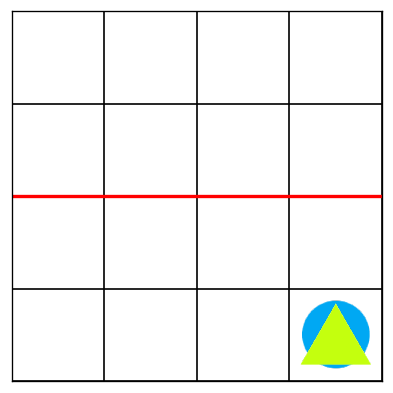

In [10]:
# Combinación 1+2
comb_12 = Ytoria([reglas[0], reglas[1]])
F_12 = inorder_to_tree(comb_12)
t0 = time.time()
I_12 = F_12.SATtableauxProfundidad()
t1 = time.time()
print('1+2 - SAT:', I_12 is not None, 'Tiempo(s):', round(t1-t0,6))
if I_12 is not None:
    p.visualizar(I_12)

1+2+3 - SAT: True Tiempo(s): 0.003719


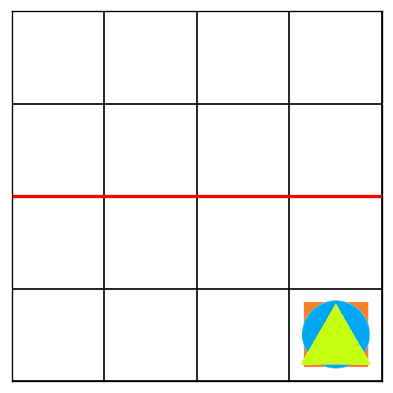

In [11]:
# Combinación 1+2+3
comb_123 = Ytoria([reglas[0], reglas[1], reglas[2]])
F_123 = inorder_to_tree(comb_123)
t0 = time.time()
I_123 = F_123.SATtableauxProfundidad()
t1 = time.time()
print('1+2+3 - SAT:', I_123 is not None, 'Tiempo(s):', round(t1-t0,6))
if I_123 is not None:
    p.visualizar(I_123)

1-4 - SAT: True Tiempo(s): 0.012635


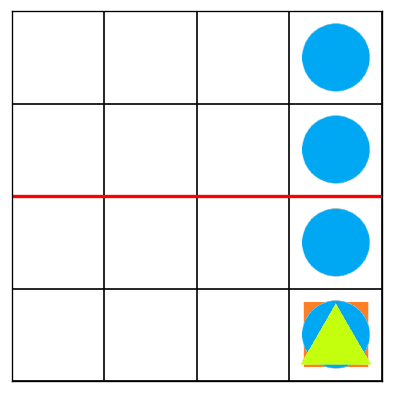

In [12]:
# Combinación 1-4 (1..4)
comb_1_4 = Ytoria([reglas[0], reglas[1], reglas[2], reglas[3]])
F_1_4 = inorder_to_tree(comb_1_4)
t0 = time.time()
I_1_4 = F_1_4.SATtableauxProfundidad()
t1 = time.time()
print('1-4 - SAT:', I_1_4 is not None, 'Tiempo(s):', round(t1-t0,6))
if I_1_4 is not None:
    p.visualizar(I_1_4)

1-5 - SAT: True Tiempo(s): 0.242369


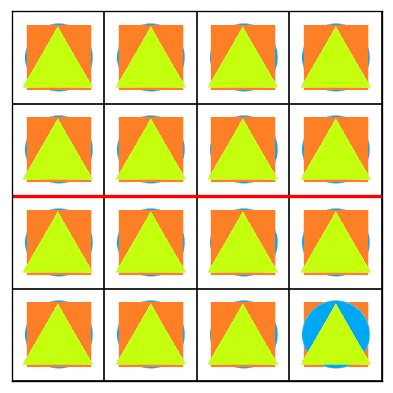

In [13]:
# Combinación 1-5 (1..5)
comb_1_5 = Ytoria([reglas[0], reglas[1], reglas[2], reglas[3], reglas[4]])
F_1_5 = inorder_to_tree(comb_1_5)
t0 = time.time()
I_1_5 = F_1_5.SATtableauxProfundidad()
t1 = time.time()
print('1-5 - SAT:', I_1_5 is not None, 'Tiempo(s):', round(t1-t0,6))
if I_1_5 is not None:
    p.visualizar(I_1_5)

1-6 - SAT: True Tiempo(s): 0.929977


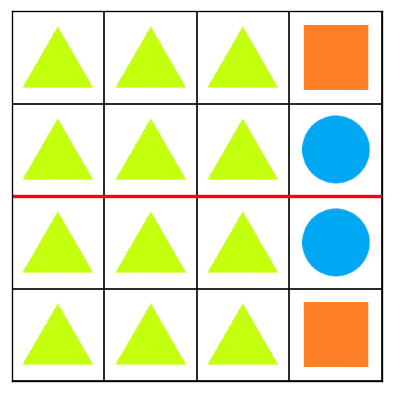

In [14]:
# Combinación 1-6 (1..6)
comb_1_6 = Ytoria([reglas[0], reglas[1], reglas[2], reglas[3], reglas[4], reglas[5]])
F_1_6 = inorder_to_tree(comb_1_6)
t0 = time.time()
I_1_6 = F_1_6.SATtableauxProfundidad()
t1 = time.time()
print('1-6 - SAT:', I_1_6 is not None, 'Tiempo(s):', round(t1-t0,6))
if I_1_6 is not None:
    p.visualizar(I_1_6)

1-7 - SAT: True Tiempo(s): 2.314223


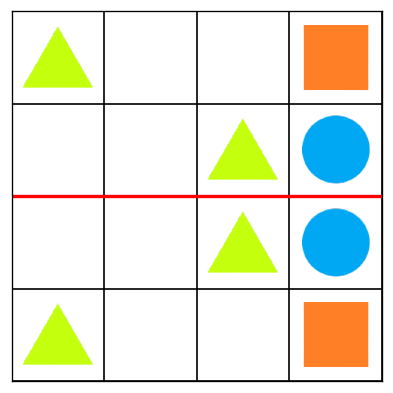

In [15]:
# Combinación 1-7 (todas)
comb_1_7 = Ytoria(reglas)
F_1_7 = inorder_to_tree(comb_1_7)
t0 = time.time()
I_1_7 = F_1_7.SATtableauxProfundidad()
t1 = time.time()
print('1-7 - SAT:', I_1_7 is not None, 'Tiempo(s):', round(t1-t0,6))
if I_1_7 is not None:
    p.visualizar(I_1_7)

## SATtableauxAnchura (BFS)
Ahora repetimos las mismas pruebas (cada regla en su propia celda) usando `SATtableauxAnchura`.

Regla 1 (BFS) - SAT: True Tiempo(s): 0.000356


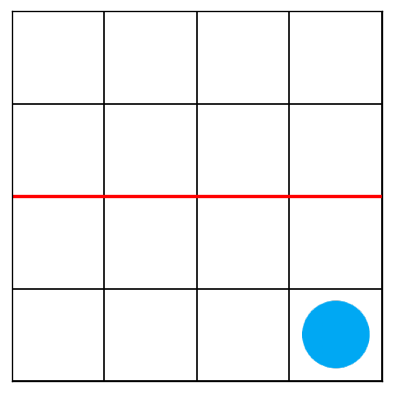

In [16]:
# Regla 1 (BFS)
F1b = inorder_to_tree(reglas[0])
t0 = time.time()
Ib1 = F1b.SATtableauxAnchura()
t1 = time.time()
print('Regla 1 (BFS) - SAT:', Ib1 is not None, 'Tiempo(s):', round(t1-t0,6))
if Ib1 is not None:
    p.visualizar(Ib1)

Regla 2 (BFS) - SAT: True Tiempo(s): 0.000291


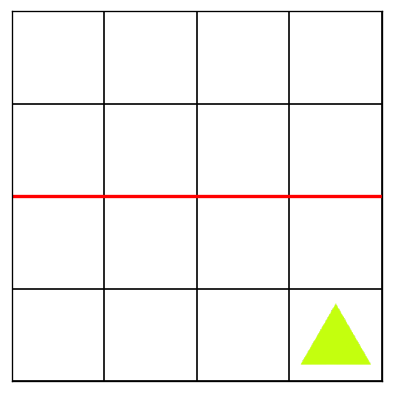

In [17]:
# Regla 2 (BFS)
F2b = inorder_to_tree(reglas[1])
t0 = time.time()
Ib2 = F2b.SATtableauxAnchura()
t1 = time.time()
print('Regla 2 (BFS) - SAT:', Ib2 is not None, 'Tiempo(s):', round(t1-t0,6))
if Ib2 is not None:
    p.visualizar(Ib2)

Regla 3 (BFS) - SAT: True Tiempo(s): 0.000369


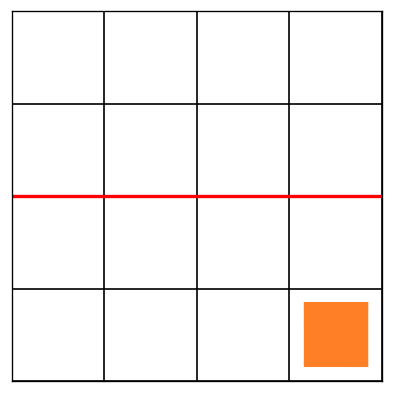

In [18]:
# Regla 3 (BFS)
F3b = inorder_to_tree(reglas[2])
t0 = time.time()
Ib3 = F3b.SATtableauxAnchura()
t1 = time.time()
print('Regla 3 (BFS) - SAT:', Ib3 is not None, 'Tiempo(s):', round(t1-t0,6))
if Ib3 is not None:
    p.visualizar(Ib3)

Regla 4 (BFS) - SAT: True Tiempo(s): 0.010041


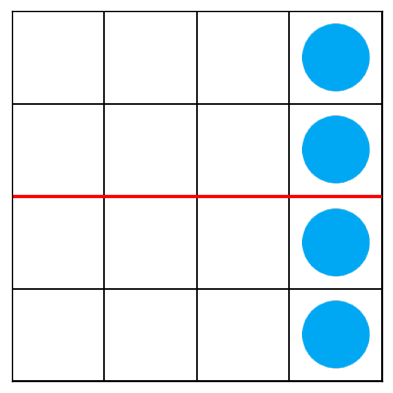

In [19]:
# Regla 4 (BFS)
F4b = inorder_to_tree(reglas[3])
t0 = time.time()
Ib4 = F4b.SATtableauxAnchura()
t1 = time.time()
print('Regla 4 (BFS) - SAT:', Ib4 is not None, 'Tiempo(s):', round(t1-t0,6))
if Ib4 is not None:
    p.visualizar(Ib4)

In [20]:
# Regla 5 (BFS)
F5b = inorder_to_tree(reglas[4])
t0 = time.time()
Ib5 = F5b.SATtableauxAnchura()
t1 = time.time()
print('Regla 5 (BFS) - SAT:', Ib5 is not None, 'Tiempo(s):', round(t1-t0,6))
if Ib5 is not None:
    p.visualizar(Ib5)

KeyboardInterrupt: 

In [ ]:
# Regla 6 (BFS)
F6b = inorder_to_tree(reglas[5])
t0 = time.time()
Ib6 = F6b.SATtableauxAnchura()
t1 = time.time()
print('Regla 6 (BFS) - SAT:', Ib6 is not None, 'Tiempo(s):', round(t1-t0,6))
if Ib6 is not None:
    p.visualizar(Ib6)

In [ ]:
# Regla 7 (BFS)
F7b = inorder_to_tree(reglas[6])
t0 = time.time()
Ib7 = F7b.SATtableauxAnchura()
t1 = time.time()
print('Regla 7 (BFS) - SAT:', Ib7 is not None, 'Tiempo(s):', round(t1-t0,6))
if Ib7 is not None:
    p.visualizar(Ib7)

### Combinaciones (BFS) - cada combinación en su propia celda
Mismas combinaciones que en DFS, cada una en celda separada.

1+2 (BFS) - SAT: True Tiempo(s): 0.00164


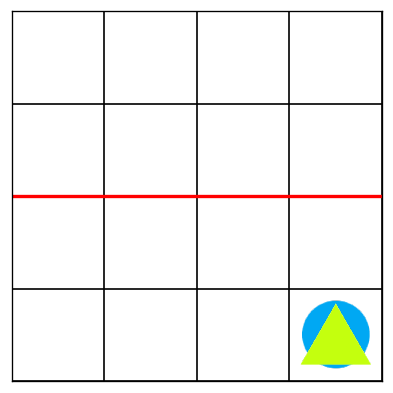

In [21]:
# 1+2 (BFS)
comb_12_b = Ytoria([reglas[0], reglas[1]])
F_12_b = inorder_to_tree(comb_12_b)
t0 = time.time()
I_12_b = F_12_b.SATtableauxAnchura()
t1 = time.time()
print('1+2 (BFS) - SAT:', I_12_b is not None, 'Tiempo(s):', round(t1-t0,6))
if I_12_b is not None:
    p.visualizar(I_12_b)

1+2+3 (BFS) - SAT: True Tiempo(s): 0.00559


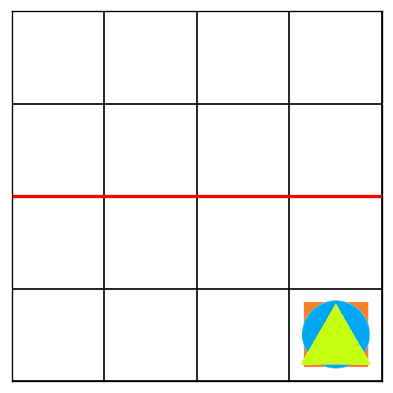

In [22]:
# 1+2+3 (BFS)
comb_123_b = Ytoria([reglas[0], reglas[1], reglas[2]])
F_123_b = inorder_to_tree(comb_123_b)
t0 = time.time()
I_123_b = F_123_b.SATtableauxAnchura()
t1 = time.time()
print('1+2+3 (BFS) - SAT:', I_123_b is not None, 'Tiempo(s):', round(t1-t0,6))
if I_123_b is not None:
    p.visualizar(I_123_b)

1-4 (BFS) - SAT: True Tiempo(s): 0.174096


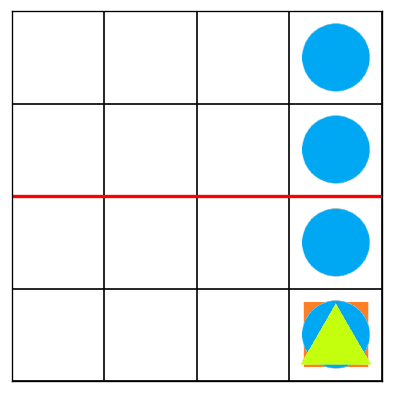

In [23]:
# 1-4 (BFS)
comb_1_4_b = Ytoria([reglas[0], reglas[1], reglas[2], reglas[3]])
F_1_4_b = inorder_to_tree(comb_1_4_b)
t0 = time.time()
I_1_4_b = F_1_4_b.SATtableauxAnchura()
t1 = time.time()
print('1-4 (BFS) - SAT:', I_1_4_b is not None, 'Tiempo(s):', round(t1-t0,6))
if I_1_4_b is not None:
    p.visualizar(I_1_4_b)

In [24]:
# 1-5 (BFS)
comb_1_5_b = Ytoria([reglas[0], reglas[1], reglas[2], reglas[3], reglas[4]])
F_1_5_b = inorder_to_tree(comb_1_5_b)
t0 = time.time()
I_1_5_b = F_1_5_b.SATtableauxAnchura()
t1 = time.time()
print('1-5 (BFS) - SAT:', I_1_5_b is not None, 'Tiempo(s):', round(t1-t0,6))
if I_1_5_b is not None:
    p.visualizar(I_1_5_b)

KeyboardInterrupt: 

In [ ]:
# 1-6 (BFS)
comb_1_6_b = Ytoria([reglas[0], reglas[1], reglas[2], reglas[3], reglas[4], reglas[5]])
F_1_6_b = inorder_to_tree(comb_1_6_b)
t0 = time.time()
I_1_6_b = F_1_6_b.SATtableauxAnchura()
t1 = time.time()
print('1-6 (BFS) - SAT:', I_1_6_b is not None, 'Tiempo(s):', round(t1-t0,6))
if I_1_6_b is not None:
    p.visualizar(I_1_6_b)

In [ ]:
# 1-7 (BFS)
comb_1_7_b = Ytoria(reglas)
F_1_7_b = inorder_to_tree(comb_1_7_b)
t0 = time.time()
I_1_7_b = F_1_7_b.SATtableauxAnchura()
t1 = time.time()
print('1-7 (BFS) - SAT:', I_1_7_b is not None, 'Tiempo(s):', round(t1-t0,6))
if I_1_7_b is not None:
    p.visualizar(I_1_7_b)

## SATtableauxBacktracking (recursivo)
Repetimos las mismas pruebas, cada regla y cada combinación en celdas separadas usando `SATtableauxBacktracking`.

Regla 1 (Backtracking) - SAT: True Tiempo(s): 0.001769


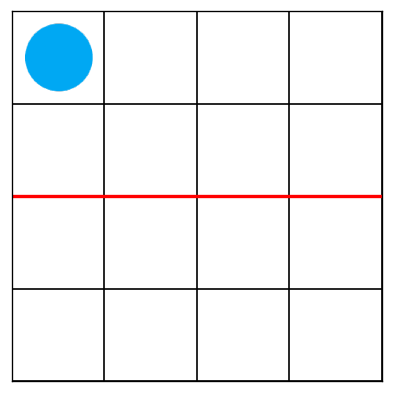

In [25]:
# Regla 1 (Backtracking)
F1c = inorder_to_tree(reglas[0])
t0 = time.time()
Ic1 = F1c.SATtableauxBacktracking()
t1 = time.time()
print('Regla 1 (Backtracking) - SAT:', Ic1 is not None, 'Tiempo(s):', round(t1-t0,6))
if Ic1 is not None:
    p.visualizar(Ic1)

Regla 2 (Backtracking) - SAT: True Tiempo(s): 0.002018


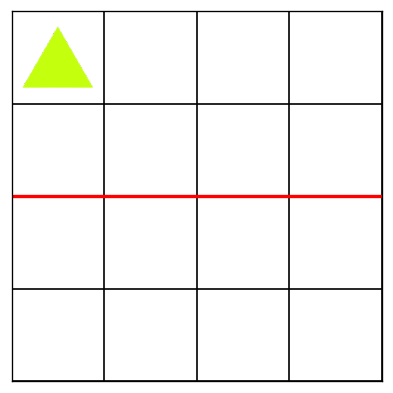

In [26]:
# Regla 2 (Backtracking)
F2c = inorder_to_tree(reglas[1])
t0 = time.time()
Ic2 = F2c.SATtableauxBacktracking()
t1 = time.time()
print('Regla 2 (Backtracking) - SAT:', Ic2 is not None, 'Tiempo(s):', round(t1-t0,6))
if Ic2 is not None:
    p.visualizar(Ic2)

Regla 3 (Backtracking) - SAT: True Tiempo(s): 0.002301


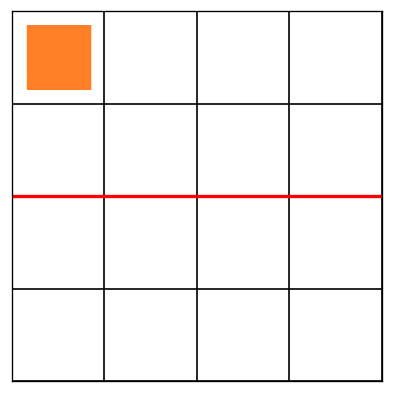

In [27]:
# Regla 3 (Backtracking)
F3c = inorder_to_tree(reglas[2])
t0 = time.time()
Ic3 = F3c.SATtableauxBacktracking()
t1 = time.time()
print('Regla 3 (Backtracking) - SAT:', Ic3 is not None, 'Tiempo(s):', round(t1-t0,6))
if Ic3 is not None:
    p.visualizar(Ic3)

Regla 4 (Backtracking) - SAT: True Tiempo(s): 0.0246


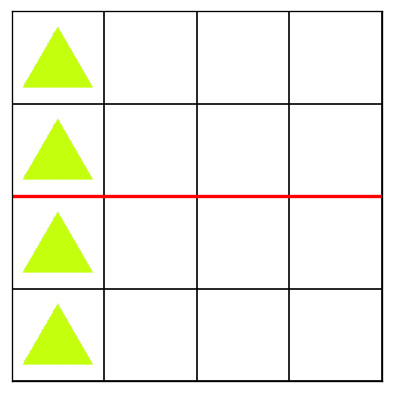

In [28]:
# Regla 4 (Backtracking)
F4c = inorder_to_tree(reglas[3])
t0 = time.time()
Ic4 = F4c.SATtableauxBacktracking()
t1 = time.time()
print('Regla 4 (Backtracking) - SAT:', Ic4 is not None, 'Tiempo(s):', round(t1-t0,6))
if Ic4 is not None:
    p.visualizar(Ic4)

Regla 5 (Backtracking) - SAT: True Tiempo(s): 0.155112


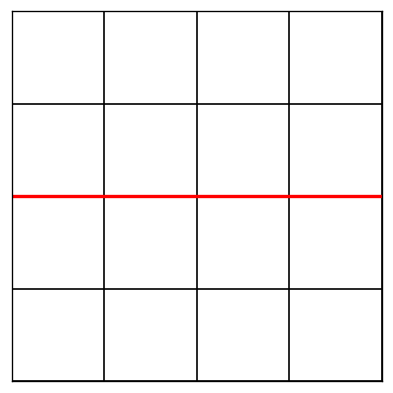

In [29]:
# Regla 5 (Backtracking)
F5c = inorder_to_tree(reglas[4])
t0 = time.time()
Ic5 = F5c.SATtableauxBacktracking()
t1 = time.time()
print('Regla 5 (Backtracking) - SAT:', Ic5 is not None, 'Tiempo(s):', round(t1-t0,6))
if Ic5 is not None:
    p.visualizar(Ic5)

Regla 6 (Backtracking) - SAT: True Tiempo(s): 0.416853


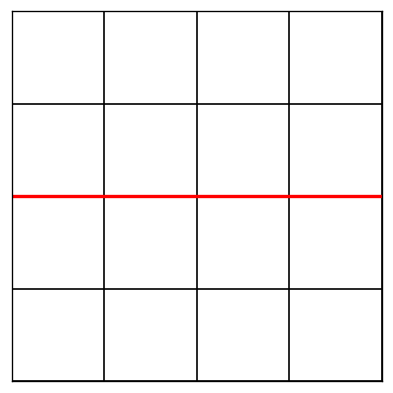

In [30]:
# Regla 6 (Backtracking)
F6c = inorder_to_tree(reglas[5])
t0 = time.time()
Ic6 = F6c.SATtableauxBacktracking()
t1 = time.time()
print('Regla 6 (Backtracking) - SAT:', Ic6 is not None, 'Tiempo(s):', round(t1-t0,6))
if Ic6 is not None:
    p.visualizar(Ic6)

Regla 7 (Backtracking) - SAT: True Tiempo(s): 0.348499


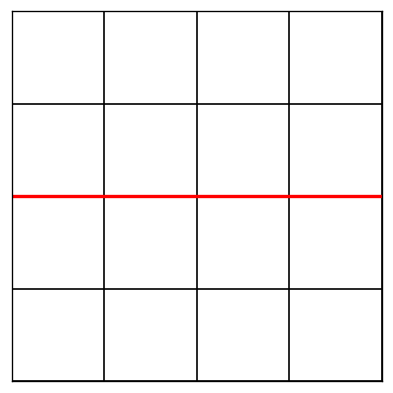

In [31]:
# Regla 7 (Backtracking)
F7c = inorder_to_tree(reglas[6])
t0 = time.time()
Ic7 = F7c.SATtableauxBacktracking()
t1 = time.time()
print('Regla 7 (Backtracking) - SAT:', Ic7 is not None, 'Tiempo(s):', round(t1-t0,6))
if Ic7 is not None:
    p.visualizar(Ic7)

### Combinaciones (Backtracking) - cada combinación en su propia celda
Repetimos las mismas combinaciones que antes, cada una en su celda.

1+2 (Backtracking) - SAT: True Tiempo(s): 0.009835


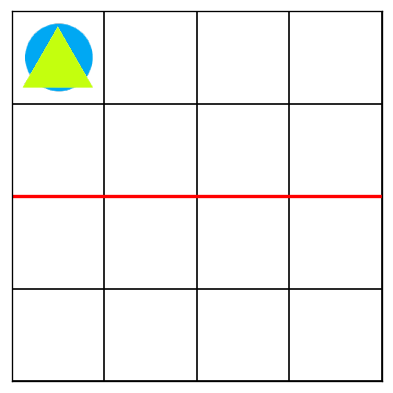

In [32]:
# 1+2 (Backtracking)
comb_12_c = Ytoria([reglas[0], reglas[1]])
F_12_c = inorder_to_tree(comb_12_c)
t0 = time.time()
I_12_c = F_12_c.SATtableauxBacktracking()
t1 = time.time()
print('1+2 (Backtracking) - SAT:', I_12_c is not None, 'Tiempo(s):', round(t1-t0,6))
if I_12_c is not None:
    p.visualizar(I_12_c)

1+2+3 (Backtracking) - SAT: True Tiempo(s): 0.02384


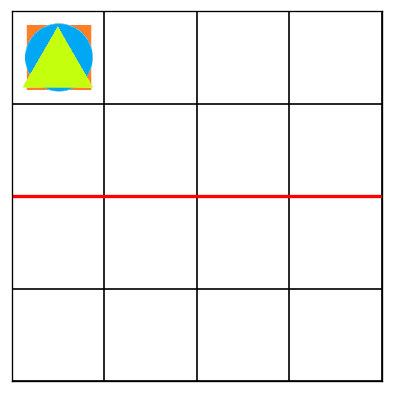

In [33]:
# 1+2+3 (Backtracking)
comb_123_c = Ytoria([reglas[0], reglas[1], reglas[2]])
F_123_c = inorder_to_tree(comb_123_c)
t0 = time.time()
I_123_c = F_123_c.SATtableauxBacktracking()
t1 = time.time()
print('1+2+3 (Backtracking) - SAT:', I_123_c is not None, 'Tiempo(s):', round(t1-t0,6))
if I_123_c is not None:
    p.visualizar(I_123_c)

1-4 (Backtracking) - SAT: True Tiempo(s): 0.103741


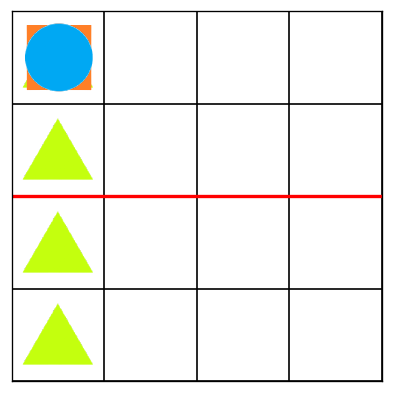

In [34]:
# 1-4 (Backtracking)
comb_1_4_c = Ytoria([reglas[0], reglas[1], reglas[2], reglas[3]])
F_1_4_c = inorder_to_tree(comb_1_4_c)
t0 = time.time()
I_1_4_c = F_1_4_c.SATtableauxBacktracking()
t1 = time.time()
print('1-4 (Backtracking) - SAT:', I_1_4_c is not None, 'Tiempo(s):', round(t1-t0,6))
if I_1_4_c is not None:
    p.visualizar(I_1_4_c)

1-5 (Backtracking) - SAT: True Tiempo(s): 3.722514


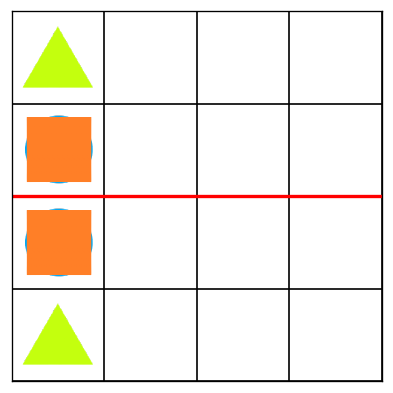

In [35]:
# 1-5 (Backtracking)
comb_1_5_c = Ytoria([reglas[0], reglas[1], reglas[2], reglas[3], reglas[4]])
F_1_5_c = inorder_to_tree(comb_1_5_c)
t0 = time.time()
I_1_5_c = F_1_5_c.SATtableauxBacktracking()
t1 = time.time()
print('1-5 (Backtracking) - SAT:', I_1_5_c is not None, 'Tiempo(s):', round(t1-t0,6))
if I_1_5_c is not None:
    p.visualizar(I_1_5_c)

In [36]:
# 1-6 (Backtracking)
comb_1_6_c = Ytoria([reglas[0], reglas[1], reglas[2], reglas[3], reglas[4], reglas[5]])
F_1_6_c = inorder_to_tree(comb_1_6_c)
t0 = time.time()
I_1_6_c = F_1_6_c.SATtableauxBacktracking()
t1 = time.time()
print('1-6 (Backtracking) - SAT:', I_1_6_c is not None, 'Tiempo(s):', round(t1-t0,6))
if I_1_6_c is not None:
    p.visualizar(I_1_6_c)

KeyboardInterrupt: 

In [ ]:
# 1-7 (Backtracking)
comb_1_7_c = Ytoria(reglas)
F_1_7_c = inorder_to_tree(comb_1_7_c)
t0 = time.time()
I_1_7_c = F_1_7_c.SATtableauxBacktracking()
t1 = time.time()
print('1-7 (Backtracking) - SAT:', I_1_7_c is not None, 'Tiempo(s):', round(t1-t0,6))
if I_1_7_c is not None:
    p.visualizar(I_1_7_c)

## Análisis de resultados